In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from tqdm.notebook import tqdm
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/Parkinsson disease.csv')


In [ ]:
df.shape


(195, 24)

In [ ]:
df.describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


from matplotlib import pyplot as plt
_df_0['MDVP:Fo(Hz)'].plot(kind='hist', bins=20, title='MDVP:Fo(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MDVP:Fhi(Hz)'].plot(kind='hist', bins=20, title='MDVP:Fhi(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['MDVP:Flo(Hz)'].plot(kind='hist', bins=20, title='MDVP:Flo(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['MDVP:Jitter(%)'].plot(kind='hist', bins=20, title='MDVP:Jitter(%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='MDVP:Fo(Hz)', y='MDVP:Fhi(Hz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='MDVP:Fhi(Hz)', y='MDVP:Flo(Hz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='MDVP:Flo(Hz)', y='MDVP:Jitter(%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='MDVP:Jitter(%)', y='MDVP:Jitter(Abs)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['MDVP:Fo(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Fo(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['MDVP:Fhi(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Fhi(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['MDVP:Flo(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Flo(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['MDVP:Jitter(%)'].plot(kind='line', figsize=(8, 4), title='MDVP:Jitter(%)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df = df.groupby('name').mean().reset_index()
df.drop('name', axis=1, inplace=True)


In [ ]:
columns = list(df.columns)
for col in columns:
	if col == 'class':
		continue

	filtered_columns = [col]
	for col1 in df.columns:
		if((col == col1) | (col == 'class')):
			continue

		val = df[col].corr(df[col1])

		if val > 0.7:
			# If the correlation between the two
			# features is more than 0.7 remove
			columns.remove(col1)
			continue
		else:
			filtered_columns.append(col1)

	# After each iteration filter out the columns
	# which are not highly correlated features.
	df = df[filtered_columns]
df.shape


(195, 11)

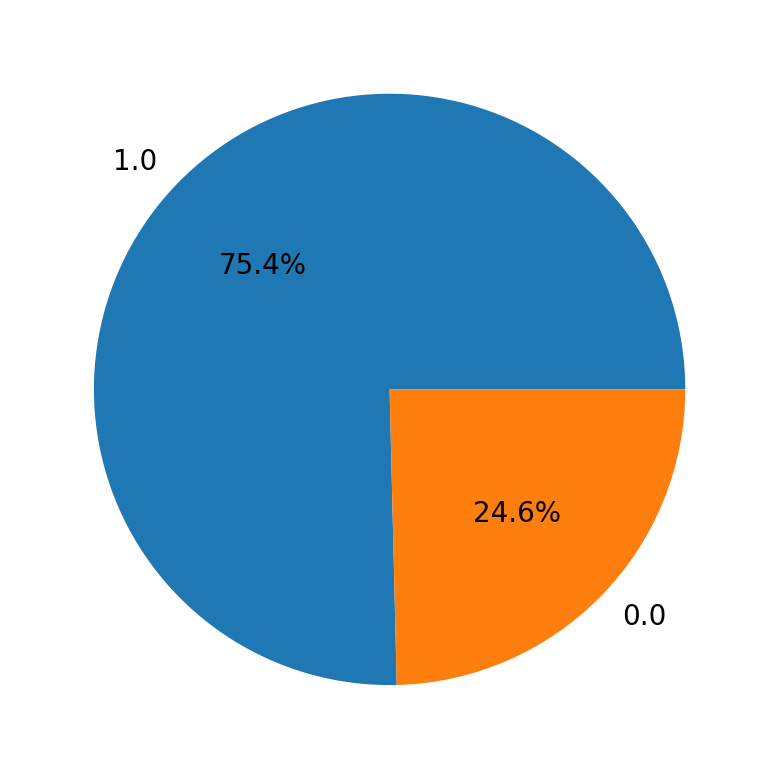

In [ ]:
x = df['status'].value_counts()
plt.pie(x.values,
		labels = x.index,
		autopct='%1.1f%%')
plt.show()





In [ ]:
features = df.drop('status', axis=1)
target = df['status']

X_train, X_val,\
	Y_train, Y_val = train_test_split(features, target,
									test_size=0.2,
									random_state=10)
X_train.shape, X_val.shape


((156, 10), (39, 10))

In [ ]:
# As the data was highly imbalanced we will balance
# it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
						random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)
X.shape, Y.shape


((238, 10), (238,))

In [ ]:
from sklearn.metrics import roc_auc_score as ras

models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]

for i in range(len(models)):
    models[i].fit(X, Y)

    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X)[:, 1]
    print('Training Accuracy : ', ras(Y, train_preds))

    val_preds = models[i].predict_proba(X_val)[:, 1]
    print('Validation Accuracy : ', ras(Y_val, val_preds))
    print()

LogisticRegression() : 
Training Accuracy :  0.8746557446508015
Validation Accuracy :  0.9805194805194806

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9999999999999999
Validation Accuracy :  1.0

SVC(probability=True) : 
Training Accuracy :  0.7040463244121178

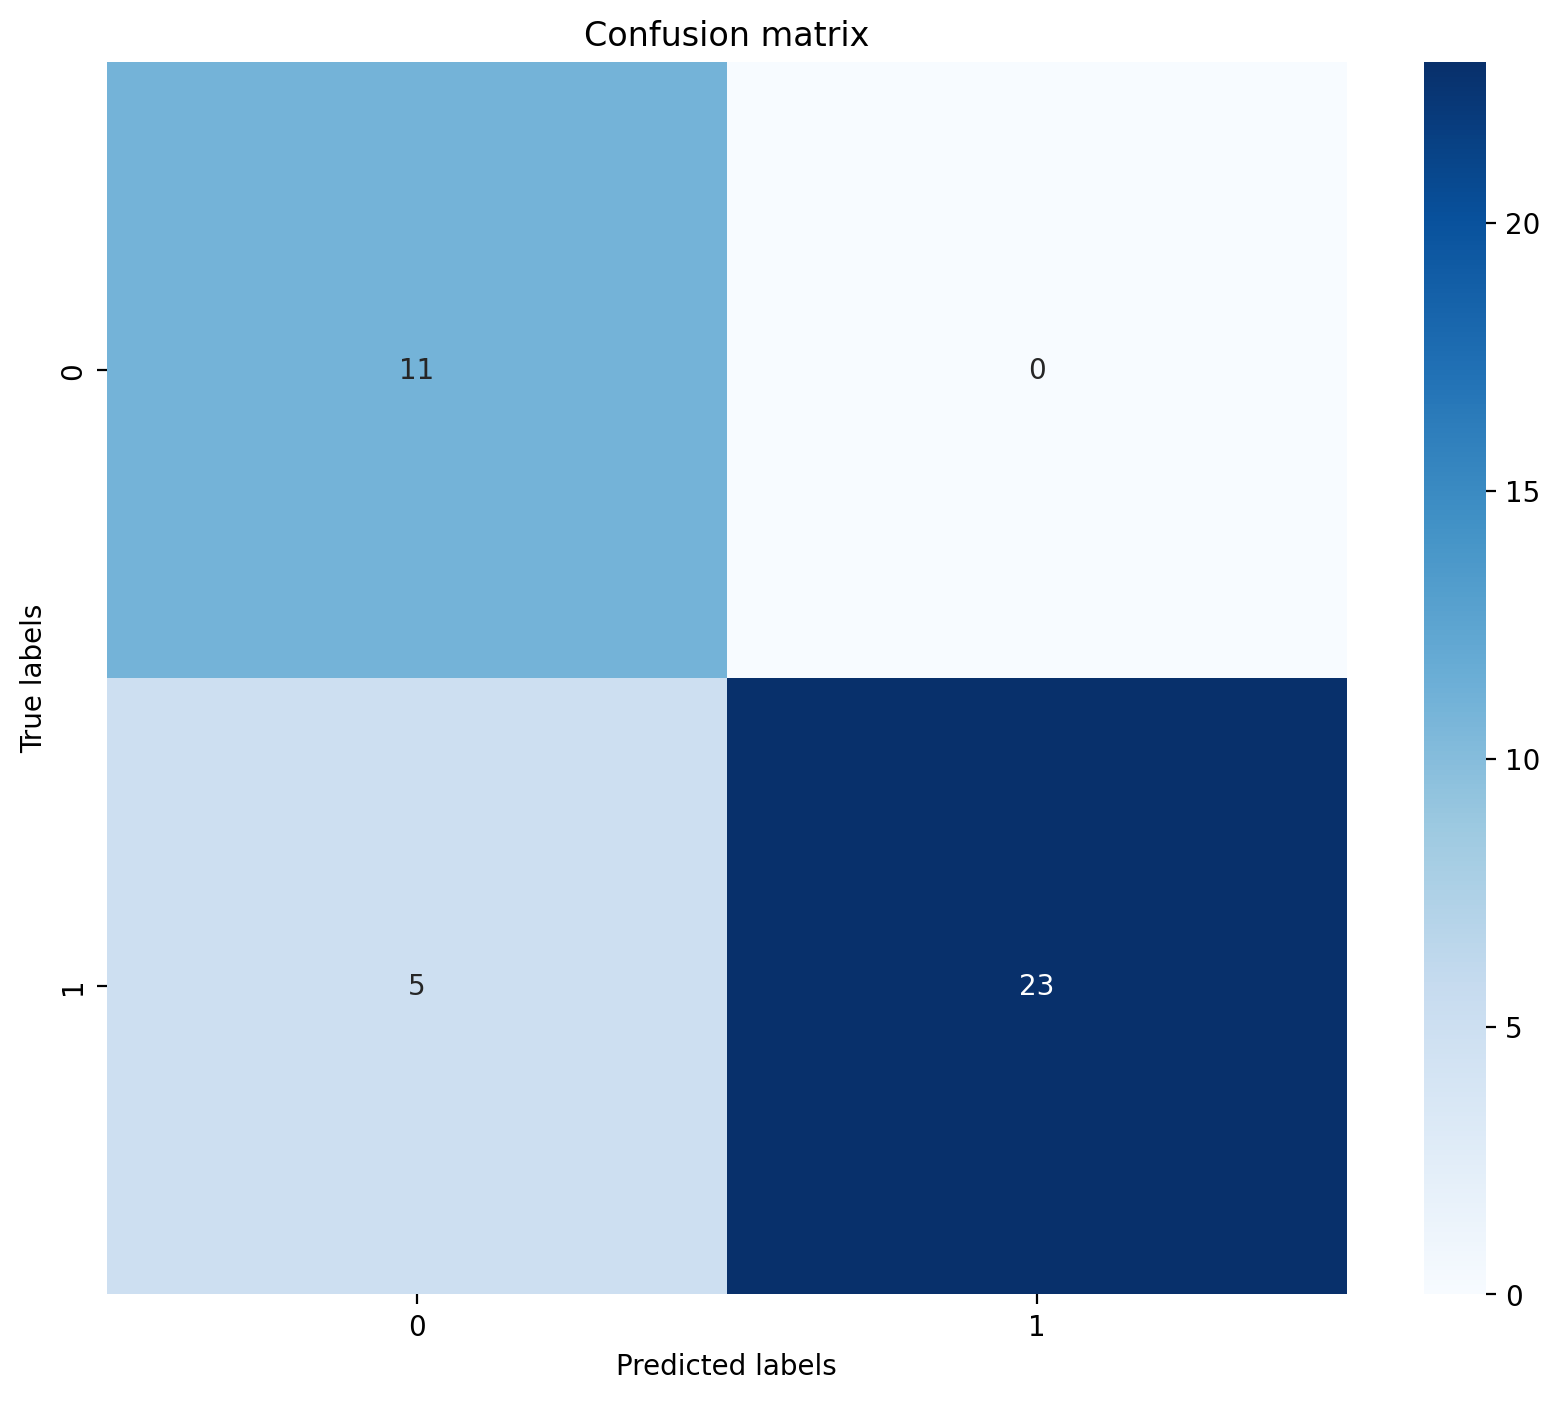

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = models[0]
y_pred = model.predict(X_val)

cm = confusion_matrix(Y_val, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [ ]:
print(metrics.classification_report
	(Y_val, models[0].predict(X_val)))


              precision    recall  f1-score   support

         0.0       0.69      1.00      0.81        11
         1.0       1.00      0.82      0.90        28

    accuracy                           0.87        39
   macro avg       0.84      0.91      0.86        39
weighted avg       0.91      0.87      0.88        39

